In [1]:
import numpy as np
# keras.utilsからnp_utilsをインポート
from keras.utils import np_utils
# Fashion-MNISTデータセットをインポート
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [2]:
# Fashion-MNISTデータセットの読み込み
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 訓練データ
# 時系列データとして扱えるようにする
# 訓練データ(60000, 784)を(60000, 28, 28)に変換
x_train = np.reshape(x_train, (-1, 28, 28))
# 訓練データをfloat32(浮動小数点数)型に変換
x_train = x_train.astype('float32')
# データを255で割って0から1.0の範囲に変換
x_train = x_train / 255

# 正解ラベルの数
correct = 10
# 正解ラベルをワンホット符号化法で変換
y_train = np_utils.to_categorical(y_train, correct)

# テストデータ
# 時系列データとして扱えるようにする
# テストデータ(10000, 784)を(60000, 28, 28)に変換
x_test = np.reshape(x_test, (-1, 28, 28))
# テストデータをfloat32(浮動小数点数)型に変換
x_test = x_test.astype('float32')
# データを255で割って0から1.0の範囲に変換
x_test = x_test / 255
# 正解ラベルをンホット符号化法で変換
y_test = np_utils.to_categorical(y_test, correct)

In [3]:
# RNNの構築
from keras.models import Sequential
from keras.layers import InputLayer, Dense
from keras.layers.recurrent import LSTM
from keras import optimizers,regularizers

# Sequentialオブジェクトを生成
model = Sequential()

## 入力層
# 入力データの形状は(28, 28)
model.add(
    InputLayer(input_shape=(28,28))
    )

## 中間層
# LSTMブロック（ユニット数＝128）
weight_decay = 1e-4                  # ハイパーパラメーター
model.add(LSTM(units=128, dropout=0.25, return_sequences=True))
model.add(LSTM(units=128, dropout=0.25, return_sequences=True))
model.add(LSTM(units=128, dropout=0.25, return_sequences=False,
               kernel_regularizer=regularizers.l2(weight_decay)) # 正則化
)

## 出力層
model.add(
    Dense(units=10,                  # 出力層のニューロン数は10
          activation='softmax')      # 活性化はシグモイド関数
    )

# Squentialオブジェクをコンパイル
model.compile(
    loss='categorical_crossentropy', # 誤差関数はクロスエントロピー
    optimizer=optimizers.Adam(),     # Adamオプティマイザー
    metrics=['accuracy']             # 学習評価として正解率を指定
    )

model.summary()                      # RNNのサマリ（概要）を出力

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 28, 128)           80384     
_________________________________________________________________
lstm_2 (LSTM)                (None, 28, 128)           131584    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 344,842
Trainable params: 344,842
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 学習
history = model.fit(x_train, y_train, # 訓練データ、正解ラベル
                    batch_size=100,     # ミニバッチのサイズ
                    epochs=50,          # 学習回数
                    verbose=1,          # 学習の進捗状況を出力する
                    validation_data=(   # テストデータの指定
                    x_test, y_test)
                    )

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 101s 2ms/step - loss: 0.7898 - acc: 0.7110 - val_loss: 0.5797 - val_acc: 0.7901
Epoch 2/50
60000/60000 [==============================] - 97s 2ms/step - loss: 0.5437 - acc: 0.8041 - val_loss: 0.4711 - val_acc: 0.8328
Epoch 3/50
60000/60000 [==============================] - 96s 2ms/step - loss: 0.4717 - acc: 0.8281 - val_loss: 0.4426 - val_acc: 0.8358
Epoch 4/50
60000/60000 [==============================] - 97s 2ms/step - loss: 0.4369 - acc: 0.8417 - val_loss: 0.4079 - val_acc: 0.8534
Epoch 5/50
60000/60000 [==============================] - 97s 2ms/step - loss: 0.4107 - acc: 0.8520 - val_loss: 0.3909 - val_acc: 0.8570
Epoch 6/50
60000/60000 [==============================] - 100s 2ms/step - loss: 0.3924 - acc: 0.8588 - val_loss: 0.3832 - val_acc: 0.8580
Epoch 7/50
60000/60000 [==============================] - 98s 2ms/step - loss: 0.3762 - acc: 0.8645 - val_loss: 0.3575 - val_a

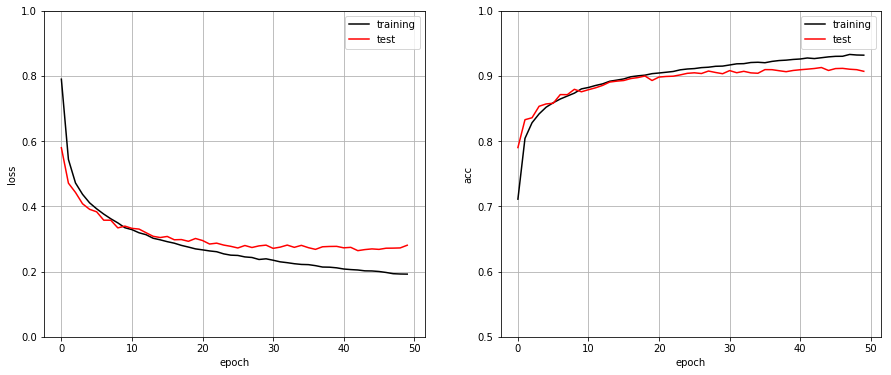

In [5]:
# 損失と正解率をグラフにする
%matplotlib inline
import matplotlib.pyplot as plt

# プロット図のサイズを設定
plt.ﬁgure(ﬁgsize=(15, 6))
# プロット図を縮小して図の間のスペースを空ける
plt.subplots_adjust(wspace=0.2)

# 1×2のグリッドの左(1,2,1)の領域にプロット
plt.subplot(1, 2, 1)
# 訓練データの損失(誤り率)をプロット
plt.plot(history.history['loss'],
         label='training',
         color='black')
# テストデータの損失(誤り率)をプロット
plt.plot(history.history['val_loss'],
         label='test',
         color='red')
plt.ylim(0, 1)       # y軸の範囲
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('loss')   # y軸ラベル

# 1×2のグリッドの右(1,2,21)の領域にプロット
plt.subplot(1, 2, 2)
# 訓練データの正解率をプロット
plt.plot(history.history['acc'],
         label='training',
         color='black')
# テストデータの正解率をプロット
plt.plot(history.history['val_acc'],
         label='test',
         color='red')
plt.ylim(0.5, 1)     # y軸の範囲
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('acc')    # y軸ラベル
plt.show()